In [64]:
import matplotlib.pyplot as plt
import numpy as np



In [69]:
Fs = 1
f = 1
min_in = 0
max_in = 1
noise_mu = 0
noise_sigma = 0.1
linspace_predict = 1000
linspace_input = 20

# hyperparameter
COMPLEXITY = 4

def make_sine_func(x):
    return np.sin(2 * np.pi * f * x / Fs)

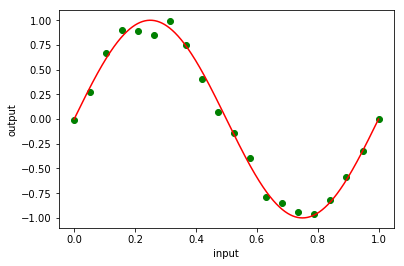

In [71]:

X = np.linspace(min_in, max_in, linspace_input)
noise = np.random.normal(noise_mu, noise_sigma, x.size)
T = make_sine_func(x) + noise

x0 = np.linspace(min_in, max_in, linspace_predict)
y0 = make_sine_func(x0)
plt.plot(X, T, 'go')
plt.plot(x0, y0, 'r')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [145]:
def phi_j(x, j):
    return np.power(x, j)
def phi(x, M):
    return np.fromiter((np.power(x, i) for i in range(M)), np.float)
def predict(M, W, x):
    result = 0
    #print(W)
    for i in range(M):
        result += W[i] * phi_j(x, i)
    return result
def square_error(M, W, t, x):
    #print("T:{}".format(t))
    #print("X:{}".format(predict(M, W, x)))
    return np.power(t - predict(M, W, x), 2)
def sum_of_square(X, T, W, M):
    result = 0
    for i in range(X.size):
        result += np.divide(1, 2) * square_error(M, W, T[i], X[i])
    return result
def regularized_error(X, T, W, M, weight_decay):
    return sum_of_square(X, T, W, M) + weight_decay * np.divide(1, 2) * np.linalg.norm(W)
def initialize_weight(M, sigma):
    W = np.random.normal(0, sigma, M)
    return W
def gradient(X, T, W, M, weight_decay):
    regulizer = weight_decay * W
    #regulizer[0] = 0.
    result = np.zeros(M)
    for i in range(X.size):
        result += (T[i] - predict(M, W, X[i])) * phi(X[i], M)
    result += regulizer
    return result
def update_weight(X, T, W, M, weight_decay, learning_rate):
    print(W)
    return W - learning_rate * gradient(X, T, W, M, weight_decay)

In [165]:
# hyperparameter
M = 9
LEARNING_RATE = 0.1
WEIGHT_DECAY = 0.1
WEIGHT_SIGMA = 0.1
STEP = 5

[-0.2006251   0.05664463  0.03078957  0.23392472 -0.06134812  0.11647535
 -0.06887953  0.06570267 -0.02880376]
[-0.2006251   0.05664463  0.03078957  0.23392472 -0.06134812  0.11647535
 -0.06887953  0.06570267 -0.02880376]
[-0.39200574  0.30906897  0.31933677  0.48908198  0.15797335  0.29987749
  0.08850064  0.19939388  0.08792554]
[-0.09701242  1.05224372  1.05073644  1.1449543   0.74374465  0.82197191
  0.56174251  0.6299618   0.48549268]
[ 3.20297516  3.99326935  3.58758402  3.35903711  2.71440906  2.59968331
  2.18999339  2.13489593  1.89124438]
[ 21.75548427  17.02550673  14.08919619  12.29243435  10.56914411
   9.6564951    8.63657349   8.09461812   7.45722926]


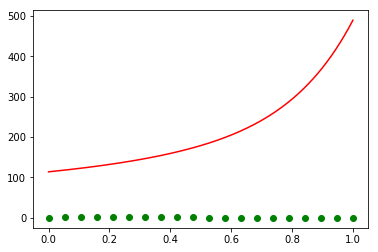

In [174]:
steps = np.arange(STEP)
errors = []
W = initialize_weight(M, WEIGHT_SIGMA)
print(W)
for _ in range(STEP):
    error = regularized_error(X, T, W, M, WEIGHT_DECAY)
    errors.append(error)
    #print(predict(M, W, X[0]))
    W = update_weight(X, T, W, M, WEIGHT_DECAY, LEARNING_RATE)

predicted = np.fromiter((predict(M, W, x0[i]) for i in range(x0.size)), np.float)
plt.plot(X, T, 'go')
plt.plot(x0, predicted, 'r') 
plt.show() 